Mounting Drive

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from keras.layers import Dense
from keras.models import Sequential
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model

Loading individual season CSV files and combining them

In [3]:
season09=pd.read_csv('/content/drive/MyDrive/season-0910.csv')
season10=pd.read_csv('/content/drive/MyDrive/season-1011.csv')
season11=pd.read_csv('/content/drive/MyDrive/season-1112.csv')
season12=pd.read_csv('/content/drive/MyDrive/season-1213.csv')
season13=pd.read_csv('/content/drive/MyDrive/season-1314.csv')
season14=pd.read_csv('/content/drive/MyDrive/season-1415.csv')
season15=pd.read_csv('/content/drive/MyDrive/season-1516.csv')
season16=pd.read_csv('/content/drive/MyDrive/season-1617.csv')
season17=pd.read_csv('/content/drive/MyDrive/season-1718.csv')
season18=pd.read_csv('/content/drive/MyDrive/season-1819.csv')
df=pd.concat([season09, season10, season11, season12, season13, season14, season15, season16, season17, season18], ignore_index=True)

df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,5,7,15,14,4,6,2,2,0,0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,9,5,12,9,5,4,2,1,0,0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,3,13,16,10,4,7,2,1,0,0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,12,3,13,15,12,4,1,2,0,0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,5,9,11,13,4,9,0,0,0,0


Using OneHotEncoder to transform nominal categorical data 


*   Home Team
*   Away Team



In [4]:
ohe=OneHotEncoder(sparse=False)

HomeTeam_Columns=ohe.fit_transform(df[['HomeTeam']])
HomeTeam_ColumnNames=ohe.get_feature_names_out(['HomeTeam'])
HomeTeam_final=pd.DataFrame(HomeTeam_Columns, columns=HomeTeam_ColumnNames)

AwayTeam_Columns=ohe.fit_transform(df[['AwayTeam']])
AwayTeam_ColumnNames=ohe.get_feature_names_out(['AwayTeam'])
AwayTeam_final=pd.DataFrame(AwayTeam_Columns, columns=AwayTeam_ColumnNames)

df=pd.concat([df, HomeTeam_final, AwayTeam_final], axis=1, sort=False)

Using OridnalEncoder to transform ordinal categorical data (with the categories being Away Win, Draw, Home Win)


1.   Half Time Result
2.   Full Time Result



In [5]:
oe=OrdinalEncoder(categories=[['A', 'D', 'H']])

HTR_Columns=oe.fit_transform(df[['HTR']])
HTR_final=pd.DataFrame(HTR_Columns, columns=['HalfTimeResult'])

FTR_Columns=oe.fit_transform(df[['FTR']])
FTR_final=pd.DataFrame(FTR_Columns, columns=['FullTimeResult'])

df=pd.concat([df, HTR_final, FTR_final], axis=1, sort=False)

OneHotEncoding the referees

In [6]:
Referee_Columns=ohe.fit_transform(df[['Referee']])
Referee_ColumnNames=ohe.get_feature_names_out(['Referee'])
Referee_final=pd.DataFrame(Referee_Columns, columns=Referee_ColumnNames)

df=pd.concat([df, Referee_final], axis=1, sort=False)
df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,Referee_P Dowd,Referee_P Tierney,Referee_P Walton,Referee_R East,Referee_R Madley,Referee_S Attwell,Referee_S Bennett,Referee_S Hooper,Referee_St Bennett,Referee_l Mason
0,15/08/09,Aston Villa,Wigan,0,2,A,0,1,A,M Clattenburg,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15/08/09,Blackburn,Man City,0,2,A,0,1,A,M Dean,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15/08/09,Bolton,Sunderland,0,1,A,0,1,A,A Marriner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15/08/09,Chelsea,Hull,2,1,H,1,1,D,A Wiley,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15/08/09,Everton,Arsenal,1,6,A,0,3,A,M Halsey,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,02/01/19,Huddersfield,Burnley,1,2,A,1,1,D,M Dean,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3626,02/01/19,Newcastle,Man United,0,2,A,0,0,D,A Marriner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3627,02/01/19,West Ham,Brighton,2,2,D,0,0,D,C Kavanagh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3628,02/01/19,Wolves,Crystal Palace,0,2,A,0,0,D,R East,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating a train-test split (75:25)

In [7]:
X=df.drop(df.select_dtypes(include=[object]).columns, axis=1)
X=X.drop(['FullTimeResult'], axis=1)
y=df['FullTimeResult']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None, test_size=0.25, shuffle=True)
y

0       0.0
1       0.0
2       0.0
3       2.0
4       0.0
       ... 
3625    0.0
3626    0.0
3627    1.0
3628    0.0
3629    2.0
Name: FullTimeResult, Length: 3630, dtype: float64

**Multiclass Classifiers**
Accuracy Scores
Confusion Matrix
AUROC

1) Logistic Regression

In [8]:
LR=LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr', max_iter = 2000).fit(X_train, y_train)
predictions_LR=LR.predict(X_test)
prob_pred_LR = LR.predict_proba(X_test)
score_LR=accuracy_score(y_test, predictions_LR)
cm_LR=confusion_matrix(y_test, predictions_LR)
auc_LR=roc_auc_score(y_test, prob_pred_LR, multi_class='ovo', average='weighted')

In [9]:
score_LR

1.0

In [10]:
cm_LR

array([[257,   0,   0],
       [  0, 221,   0],
       [  0,   0, 430]])

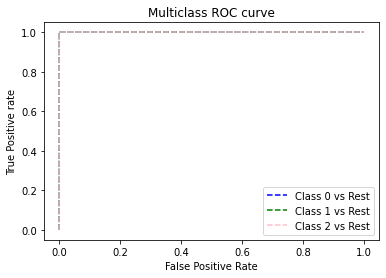

In [11]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_pred_LR[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [12]:
auc_LR

1.0

2) Decision Tree

In [13]:
DT=DecisionTreeClassifier(max_depth=5).fit(X_train, y_train)
predictions_DT=DT.predict(X_test)
prob_pred_DT=DT.predict_proba(X_test)
score_DT=accuracy_score(y_test, predictions_DT)
cm_DT=confusion_matrix(y_test, predictions_DT)
auc_DT=roc_auc_score(y_test, prob_pred_DT, multi_class='ovo', average='weighted')

In [14]:
score_DT

0.9966960352422908

In [15]:
cm_DT

array([[254,   2,   1],
       [  0, 221,   0],
       [  0,   0, 430]])

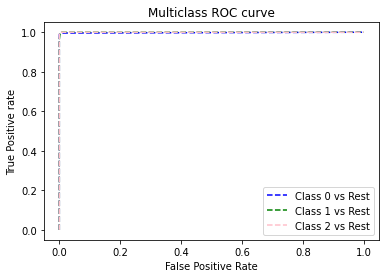

In [16]:
#roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_pred_DT[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [17]:
auc_DT

0.999327042769224

3) K-Nearest Neighbours

In [18]:
knn=KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
predictions_KNN=knn.predict(X_test)
prob_pred_KNN=knn.predict_proba(X_test)
score_KNN=accuracy_score(y_test, predictions_KNN)
cm_KNN=confusion_matrix(y_test, predictions_KNN)
auc_KNN=roc_auc_score(y_test, prob_pred_KNN, multi_class='ovo', average='weighted')

In [19]:
score_KNN

0.6024229074889867

In [20]:
cm_KNN

array([[171,  55,  31],
       [ 76,  70,  75],
       [ 43,  81, 306]])

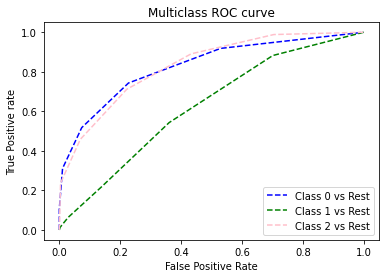

In [21]:
#roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_pred_KNN[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [22]:
auc_KNN

0.76031238324502

4) Naive Bayes

In [23]:
gnb=GaussianNB().fit(X_train, y_train)
predictions_GNB=gnb.predict(X_test)
prob_pred_GNB=gnb.predict_proba(X_test)
score_GNB=accuracy_score(y_test, predictions_GNB)
cm_GNB=confusion_matrix(y_test, predictions_GNB)
auc_GNB=roc_auc_score(y_test, prob_pred_GNB, multi_class='ovo', average='weighted')

In [24]:
score_GNB

0.512114537444934

In [25]:
cm_GNB

array([[127, 107,  23],
       [ 49, 123,  49],
       [ 39, 176, 215]])

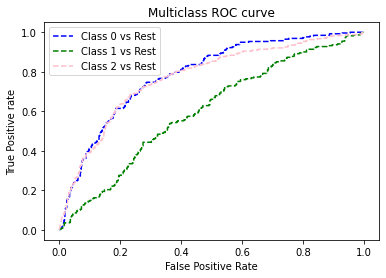

In [26]:
#roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_pred_GNB[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [27]:
auc_GNB

0.7173598285743353

5) Random Forest

In [28]:
RF=RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
predictions_RF=RF.predict(X_test)
prob_pred_RF=RF.predict_proba(X_test)
score_RF=accuracy_score(y_test, predictions_RF)
cm_RF=confusion_matrix(y_test, predictions_RF)
auc_RF=roc_auc_score(y_test, prob_pred_RF, multi_class='ovo', average='weighted')

In [29]:
score_RF

0.9702643171806168

In [30]:
cm_RF

array([[248,   8,   1],
       [  4, 207,  10],
       [  2,   2, 426]])

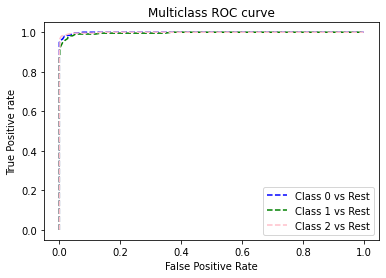

In [31]:
#roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_pred_RF[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [32]:
auc_RF

0.9979688280582724

6) Artificial Neural Network

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(122,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
checkpoint_no = 'ckpt_1_ANN'
model_name = 'Bird_ANN_2FC_F64_64_epoch_25'
checkpoint_dir = './'+ checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir + '/' + model_name, 
                                   monitor='val_loss', save_best_only=True, mode='auto')]

In [36]:
history = model.fit(X_train,
                    y_train,
                    steps_per_epoch=136,
                    epochs=25,
                    batch_size=20,
                    validation_data=(X_test, y_test),
                    validation_steps=45,
                    callbacks=[keras_callbacks])

Epoch 1/25
136/136 [==============================] - 3s 14ms/step - loss: 0.8297 - accuracy: 0.6132 - val_loss: 0.6222 - val_accuracy: 0.7378
Epoch 2/25
136/136 [==============================] - 2s 12ms/step - loss: 0.5051 - accuracy: 0.7835 - val_loss: 0.4032 - val_accuracy: 0.8311
Epoch 3/25
136/136 [==============================] - 2s 11ms/step - loss: 0.3172 - accuracy: 0.8942 - val_loss: 0.2375 - val_accuracy: 0.9467
Epoch 4/25
136/136 [==============================] - 1s 8ms/step - loss: 0.1698 - accuracy: 0.9826 - val_loss: 0.1242 - val_accuracy: 0.9878
Epoch 5/25
136/136 [==============================] - 1s 8ms/step - loss: 0.0846 - accuracy: 0.9985 - val_loss: 0.0665 - val_accuracy: 0.9978
Epoch 6/25
136/136 [==============================] - 1s 7ms/step - loss: 0.0418 - accuracy: 1.0000 - val_loss: 0.0396 - val_accuracy: 0.9978
Epoch 7/25
136/136 [==============================] - 1s 9ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.0190 - val_accuracy: 1.0000
Epo